In [73]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np

In [83]:
df_nyc_salary = pd.read_csv('nyc_salary.csv')
df_skill_list = pd.read_csv('skill_cell_nyc.csv', header=None)

In [89]:
df_update = pd.concat([df_nyc_salary, df_skill_list], axis=1).drop(columns='desc')

In [97]:
df_update.columns = ['company', 'rating', 'title', 'location', 'min','max','datepost','skills']

In [98]:
df_update

,company,rating,title,location,min,max,datepost,skills
0,HEALTHEC,3.5,Data Analyst,"Edison, NJ",49000,76000,26d,"Python,SQL,R,Tableau"
1,Blink Health,3.7,Data Analyst,"New York, NY",53000,86000,18d,"SQL,R,Spark,Big-Data,AWS"
2,Affinity Solutions,2.8,Big Data Analyst / Engineer,"New York, NY",43000,70000,11d,"Python,SQL,R,Hadoop,Tableau,Hive,SAS,Big-Data,..."
3,Conduent,2.7,"Data Analyst II (SQL, Tableau)","New York, NY",52000,86000,27d,"Python,SQL,R,Java,Tableau,Oracle"
4,MoneyLion,2.8,Risk Data Analyst,"New York, NY",43000,70000,4d,"Python,SQL,R"
...,...,...,...,...,...,...,...,...
491,Veterans Sourcing Group,2.8,Business Analyst - Data Governance,"Stamford, CT",51000,79000,30d+,NaN
492,Blue Book Network Contractors Register,2.9,Programmer Analyst/Data Strategist,"Jefferson Valley, NY",45000,62000,7d,NaN
493,"ZS Associates, Inc.",3.9,Senior Business Technology Analyst / Big Data,"Princeton, NJ",91000,113000,25d,NaN
494,Verisk,3.4,Business Analyst - Enterprise Data Management ...,"White Plains, NY",48000,75000,5d,NaN


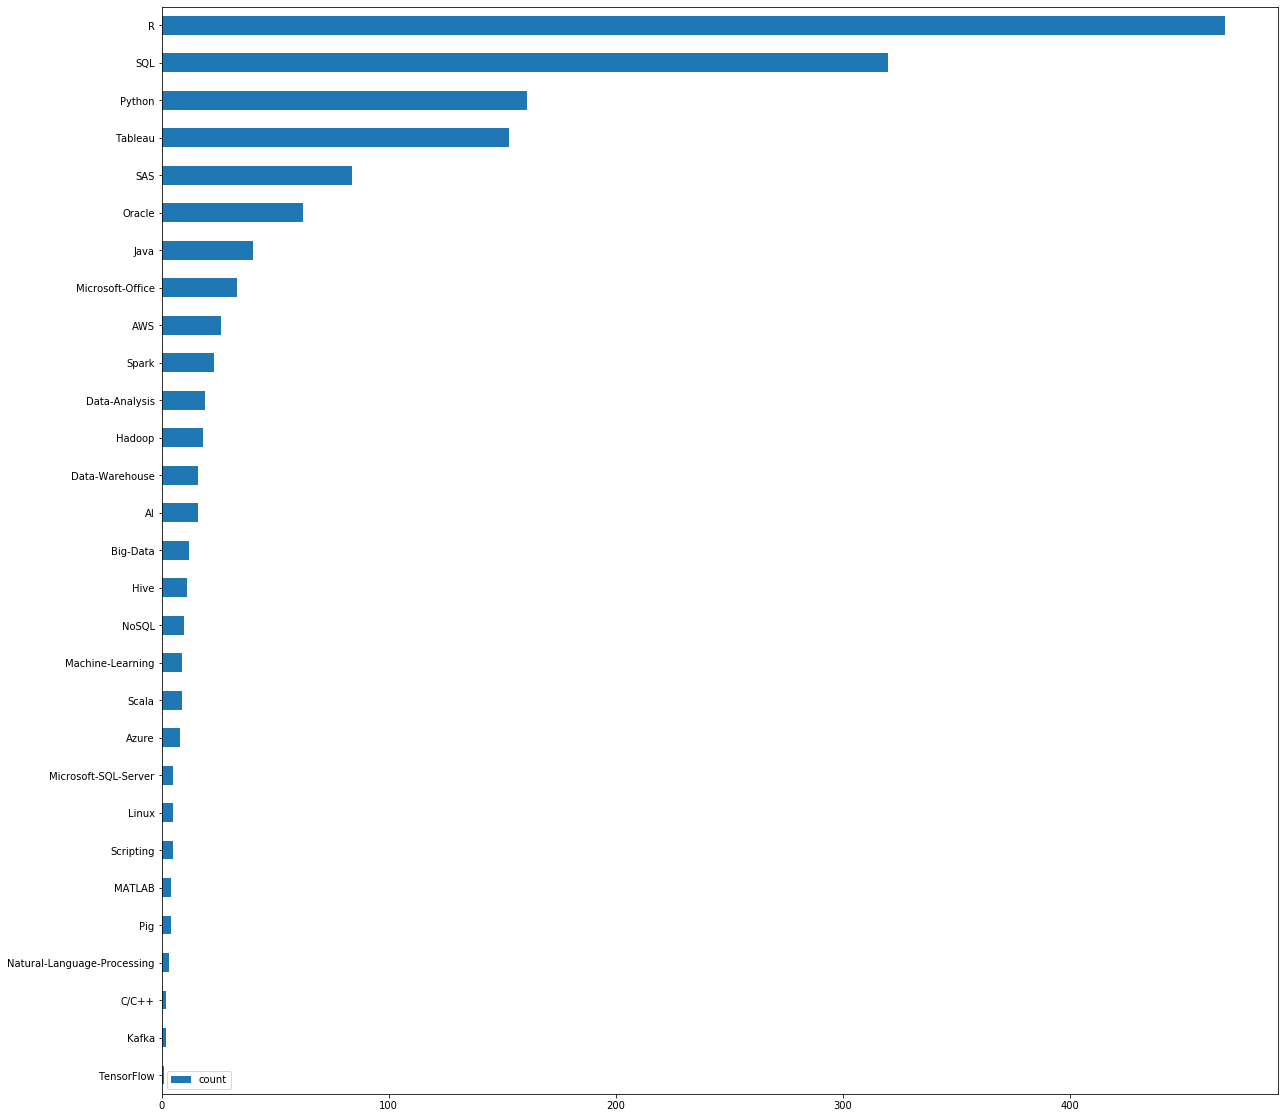

In [99]:
df_noskill = df_update.drop(['skills'], axis=1)
df_skill = df_update['skills'].str.get_dummies(sep=',')
df_skill_rank = df_skill.sum().to_frame(name='count').sort_values(by=['count'], ascending=False)[:50]
df_skill_rank.sort_values(by=['count'], ascending=True).plot.barh(figsize=(20,20))

In [121]:
df_update_all_num = pd.concat([df_update, df_skill], axis=1)
df_update_all_num = df_update_all_num.drop(columns=['company','title','location','skills','datepost'])
df_update_all_num

,rating,min,max,AI,AWS,Azure,Big-Data,C/C++,Data-Analysis,Data-Warehouse,...,Pig,Python,R,SAS,SQL,Scala,Scripting,Spark,Tableau,TensorFlow
0,3.5,49000,76000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
1,3.7,53000,86000,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,2.8,43000,70000,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,1,0
3,2.7,52000,86000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4,2.8,43000,70000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2.8,51000,79000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,2.9,45000,62000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,3.9,91000,113000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,3.4,48000,75000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df_update_all_num.columns

Index(['rating', 'min', 'max', 'AI', 'AWS', 'Azure', 'Big-Data', 'C/C++',
       'Data-Analysis', 'Data-Warehouse', 'Hadoop', 'Hive', 'Java', 'Kafka',
       'Linux', 'MATLAB', 'Machine-Learning', 'Microsoft-Office',
       'Microsoft-SQL-Server', 'Natural-Language-Processing', 'NoSQL',
       'Oracle', 'Pig', 'Python', 'R', 'SAS', 'SQL', 'Scala', 'Scripting',
       'Spark', 'Tableau', 'TensorFlow'],
      dtype='object')

In [123]:
df_update_all_num = df_update_all_num.sort_values('max', ascending=False)

In [124]:
df_update_all_num

,rating,min,max,AI,AWS,Azure,Big-Data,C/C++,Data-Analysis,Data-Warehouse,...,Pig,Python,R,SAS,SQL,Scala,Scripting,Spark,Tableau,TensorFlow
302,3.1,158000,223000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
231,3.6,156000,209000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
265,3.6,156000,209000,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,1,1
116,3.5,121000,194000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435,3.8,132000,185000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,4.1,36000,56000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
53,2.7,34000,55000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
447,3.0,33000,55000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
161,3.3,36000,51000,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [125]:
df_update_all_num = df_update_all_num.reset_index(drop=True)
df_update_all_num.head()


,rating,min,max,AI,AWS,Azure,Big-Data,C/C++,Data-Analysis,Data-Warehouse,...,Pig,Python,R,SAS,SQL,Scala,Scripting,Spark,Tableau,TensorFlow
0,3.1,158000,223000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,3.6,156000,209000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3.6,156000,209000,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,1,1
3,3.5,121000,194000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.8,132000,185000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [126]:
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [127]:
feature_names = list(df_update_all_num.drop(columns=['min','max']).columns)

In [128]:
def max_n_estimators(start_n_estimators,max_n_estimators, step):
    RMSE_list = []
    n_estimators_list = []

    X = df_update_all_num[feature_names].values
    y = df_update_all_num['max'].values

    data_dmatrix=xgb.DMatrix(data=X, label=y)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


    for n_estimators in np.arange(start_n_estimators,max_n_estimators, step):
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,n_estimators = n_estimators)

        xgb_model.fit(X_train, y_train)

        y_pred = xgb_model.predict(X)

        mse=mean_squared_error(y, y_pred)
        n_estimators_list.append(n_estimators)
        RMSE_list.append(np.sqrt(mse))
    df = pd.DataFrame({'n_estimators_list' : n_estimators_list,
                           'RMSE_list' : RMSE_list},
                          columns=['n_estimators_list','RMSE_list'])
    return df

In [131]:
df_nestimators = max_n_estimators(50,5000,50)

In [132]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_nestimators['n_estimators_list'][1:], y=df_nestimators['RMSE_list'][1:],
                    mode='markers',
                    name='n_estimators'))
fig.show()

In [151]:
X = df_update_all_num[feature_names]
y = df_update_all_num['max']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model_max = xgb.XGBRegressor(objective="reg:squarederror", random_state=123,n_estimators = 1700)

xgb_model_max.fit(X_train, y_train)

y_pred_max = xgb_model_max.predict(X)

mse=mean_squared_error(y, y_pred_max)

print('RMSE:',np.sqrt(mse))

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 20716.456391339063


In [152]:
X = df_update_all_num[feature_names]
y = df_update_all_num['min']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model_min = xgb.XGBRegressor(objective="reg:squarederror", random_state=123,n_estimators = 1700)

xgb_model_min.fit(X_train, y_train)

y_pred_min = xgb_model_min.predict(X)

mse=mean_squared_error(y, y_pred_min)

print('RMSE:',np.sqrt(mse))

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 15306.19751672584


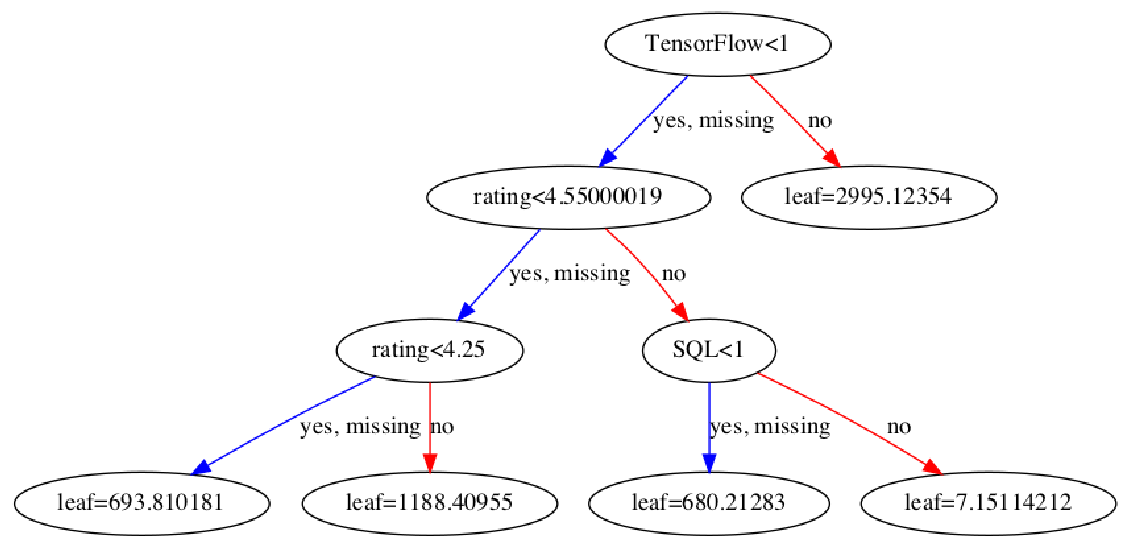

In [153]:
import matplotlib.pyplot as plt

xgb.plot_tree(xgb_model_min,num_trees=20)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [157]:
y_pred_com = pd.DataFrame(
    {'y_min': df_update_all_num['min'],
     'y_max': df_update_all_num['max'],
     'y_pred_min': y_pred_min,
     'y_pred_max': y_pred_max,
    })
y_pred_com

,y_min,y_max,y_pred_min,y_pred_max
0,158000,223000,149574.906250,205383.093750
1,156000,209000,59161.289062,91466.664062
2,156000,209000,155494.390625,209551.984375
3,121000,194000,65642.828125,103937.507812
4,132000,185000,73308.335938,114776.226562
...,...,...,...,...
491,36000,56000,38104.113281,58927.867188
492,34000,55000,47604.656250,81114.226562
493,33000,55000,51703.925781,81020.765625
494,36000,51000,51039.214844,79194.843750


In [158]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_pred_min'],
                    mode='markers',
                    name='y_pred_min'))
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_pred_max'],
                    mode='markers',
                    name='y_pred_max'))
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_min'],
                    mode='markers',
                    name='y_min'))
fig.add_trace(go.Scatter(x=np.arange(0,496), y=y_pred_com['y_max'],
                    mode='markers',
                    name='y_max'))
fig.show()

In [172]:
import pickle
pickle.dump(xgb_model_min, open('ny_min_xgb_model_min.pickle', 'wb'))
pickle.dump(xgb_model_max, open('ny_max_xgb_model_min.pickle', 'wb'))

In [174]:
xgb_model_min_loaded = pickle.load(open('ny_min_xgb_model_min.pickle', "rb"))
xgb_model_max_loaded = pickle.load(open('ny_max_xgb_model_min.pickle', "rb"))
import os
print(round(os.path.getsize('ny_max_xgb_model_min.pickle')/1000000,1), 'MB')

1.0 MB


In [177]:
print('Predicted Salary Range($): ',int(xgb_model_min_loaded.predict(X[:1])),'~',int(xgb_model_max_loaded.predict(X[:1])))

Predicted Salary Range($):  149574 ~ 205383


In [206]:
def NYC_salary_with_skills(inputs_list):
    
    sample_list = [0] * (len(X.columns))
    input_X = pd.DataFrame([sample_list],
                 columns =list(X.columns))

    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    salary = (int(xgb_model_min_loaded.predict(input_X[:1])),int(xgb_model_max_loaded.predict(input_X[:1])))
    return salary

In [238]:
NYC_salary_with_skills(['Python','SQL','Tableau','R','Microsoft-Office'])

(29605, 61957)

In [235]:
skill_money = {}
skill_money_list = []
for skill in list(X.columns)[1:]:
    skill_money['skill'] = skill
    skill_money['salary'] = NYC_salary_with_skills([skill])
    skill_money_list.append(skill_money)
    skill_money = {}
pd.DataFrame(skill_money_list).sort_values('salary',ascending=False)

,skill,salary
28,TensorFlow,"(132625, 179394)"
18,Oracle,"(71396, 94498)"
0,AI,"(47459, 82480)"
21,R,"(42221, 67301)"
7,Hadoop,"(40322, 80284)"
3,Big-Data,"(38272, 61272)"
15,Microsoft-SQL-Server,"(36264, 67543)"
5,Data-Analysis,"(35504, 64451)"
8,Hive,"(34435, 63984)"
22,SAS,"(33837, 46580)"


In [221]:
from itertools import combinations
L = list(X.columns)[1:]
unique_skill_pair = ()
for group_num in np.arange(1,5,1):
    unique_skill_pair += tuple([",".join(map(str, comb)) for comb in combinations(L, group_num)])

skill_money = {}
skill_money_list = []
for skill in unique_skill_pair:
    skill_money['skill'] = skill
    skill_money['salary'] = NYC_salary_with_skills([skill])
    skill_money_list.append(skill_money)
    skill_money = {}
df_skill_pair = pd.DataFrame(skill_money_list).drop_duplicates().sort_values('salary',ascending=False)

In [248]:
top_skill_salary = df_skill_pair[:5].reset_index(drop=True)
top_skill_salary

,skill,salary
0,TensorFlow,"(132625, 179394)"
1,Oracle,"(71396, 94498)"
2,AI,"(47459, 82480)"
3,R,"(42221, 67301)"
4,Hadoop,"(40322, 80284)"


In [264]:
NYC_salary_with_skills(['Python','SQL'])

(37540, 65197)

In [269]:
NYC_salary_with_skills(['Python','SQL','TensorFlow'])

(141098, 186723)

In [273]:
np.subtract(NYC_salary_with_skills(['Python','SQL','Hadoop']), NYC_salary_with_skills(['Python','SQL'])).mean()

20065.0